In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pickle
import os
from pathlib import Path
from datetime import datetime, timedelta

plt.style.use("~/evanstyle.mplstyle")

import sys
sys.path.append("../Dataset/")
import Dataset

In [3]:
#initialize dataset 
#topdir = "/home/esiii_lxe/HV-test/8-18-21/13-5kV-pmts/"
#topdir = "/home/esiii_lxe/HV-test/8-19-21/15kV-pmts/"
#topdir = "/home/esiii_lxe/HV-test/9-27-21/5kV-glitch/"
#topdir = "/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/Run4/ds03/"
d = Dataset.Dataset(topdir)

In [2]:
topdir = "/p/lustre1/angelico/hv-test-chamber/Run4/cosmics-overnight/"
d = pickle.load(open(topdir+"0-dataset.p", "rb"))[0]

In [44]:
#load dataset raw data, parsing the files
file_prefixes = ["pmts", "glitch"]
date_of_dataset = "4-19-23"
d.load_raw(file_prefixes, date_of_dataset, event_limit=[2000, 3000])

Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/Run4/ds03/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix pmts
Done: found 1381


Selecting files with prefix glitch
Done: found 84


Limiting the number of events to the chronological range: [2000, 3000]


In [45]:
d.create_wave_df(time_paired=False)

Pairing by their acquisition order. Not time synchronized


0it [00:00, ?it/s]

Parsing waveform data from files: 0it [00:00, ?it/s]

Finished filling a dataframe with 0 waveform events


/tmp/ipykernel_1723924/2007912040.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(row['pmts0-data'] != []):


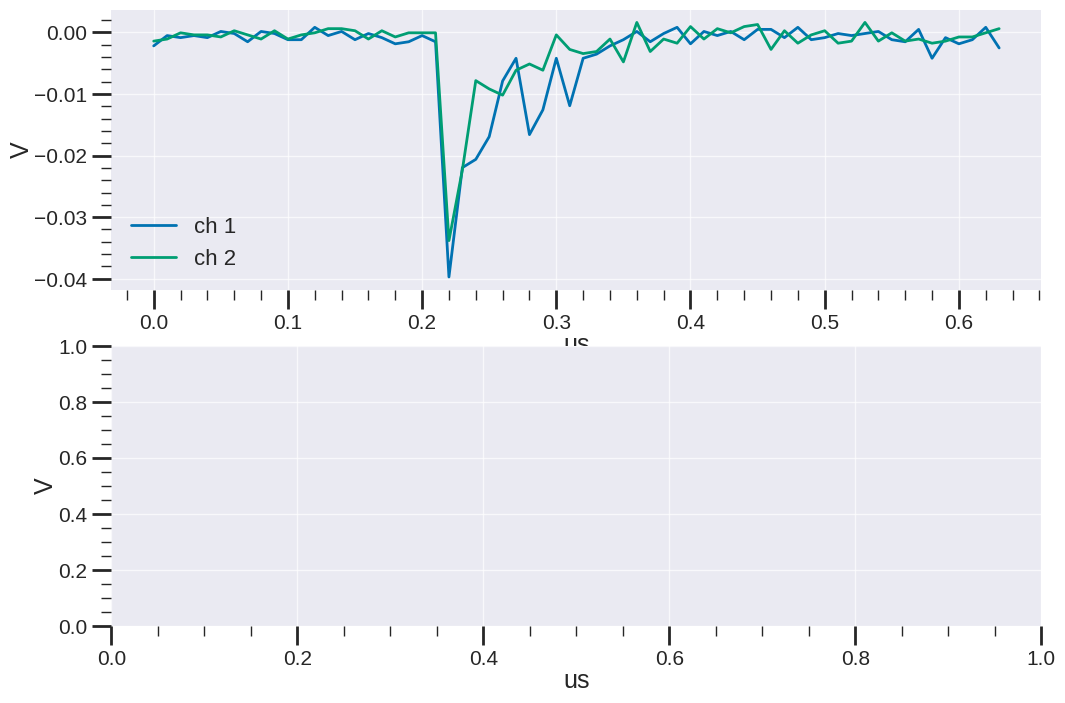

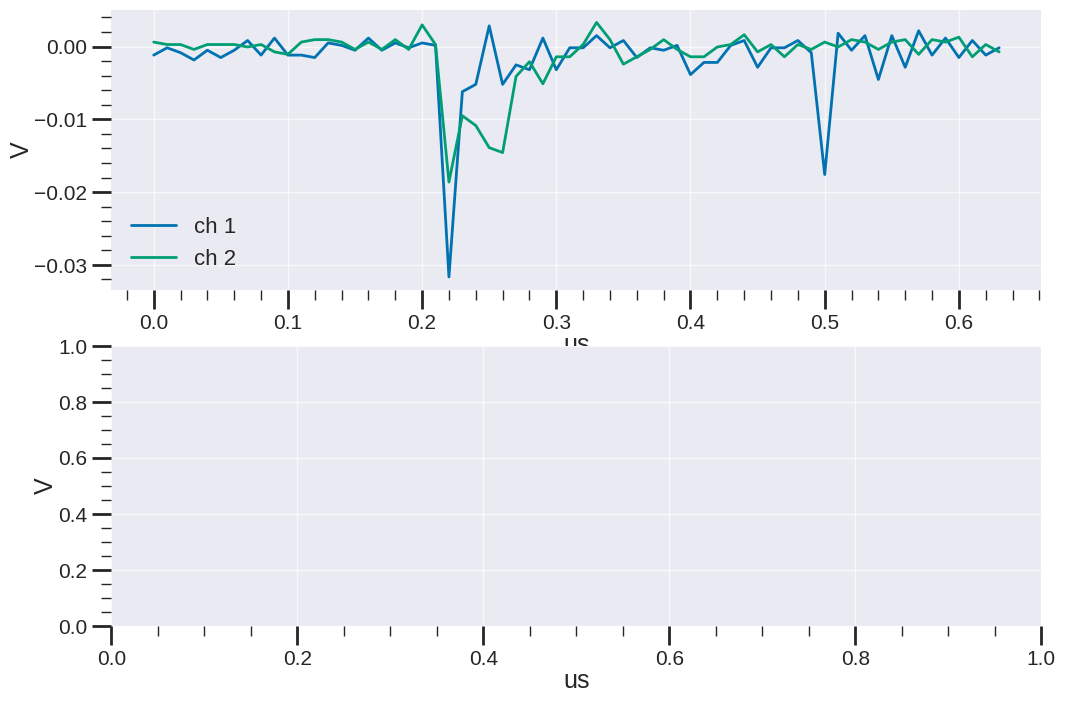

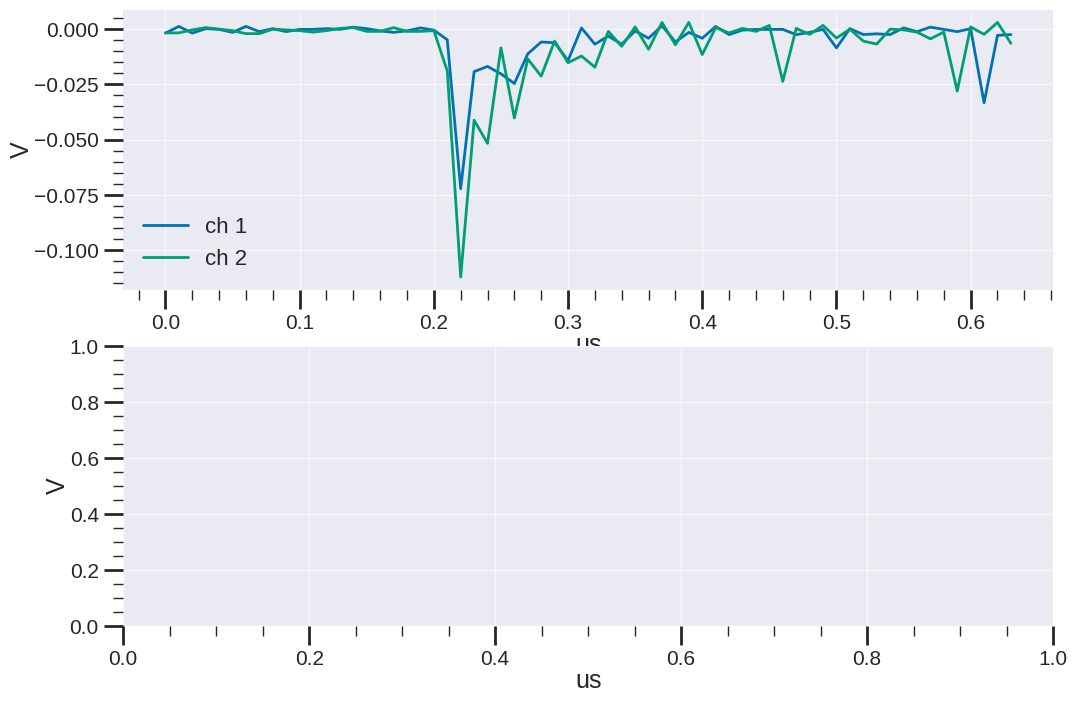

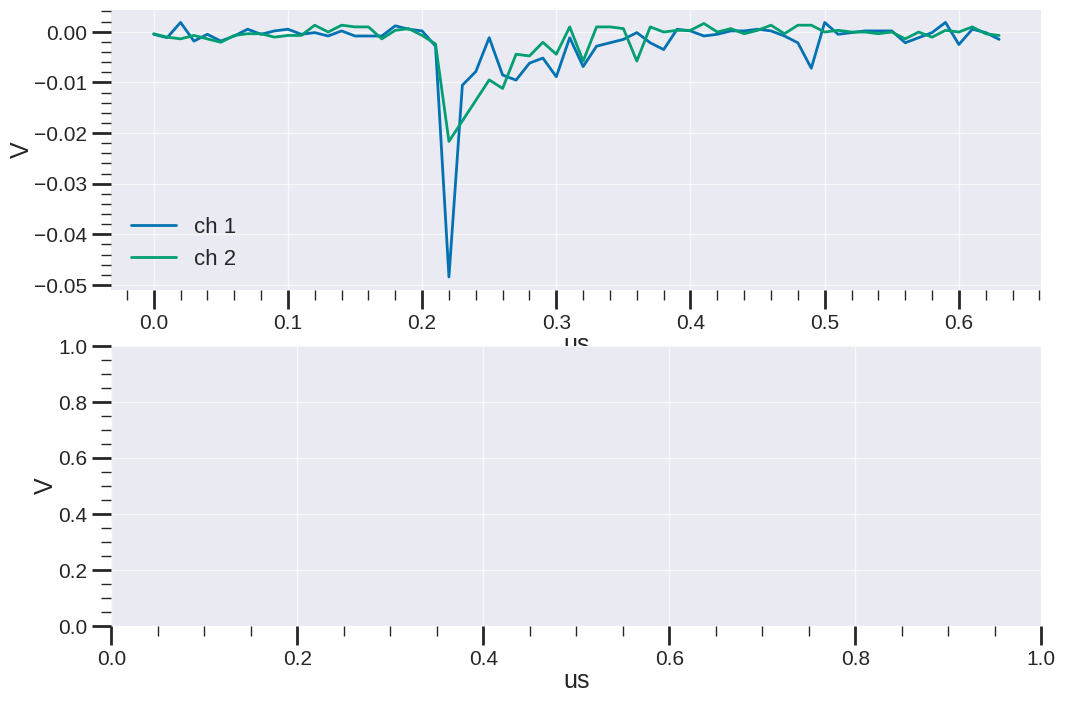

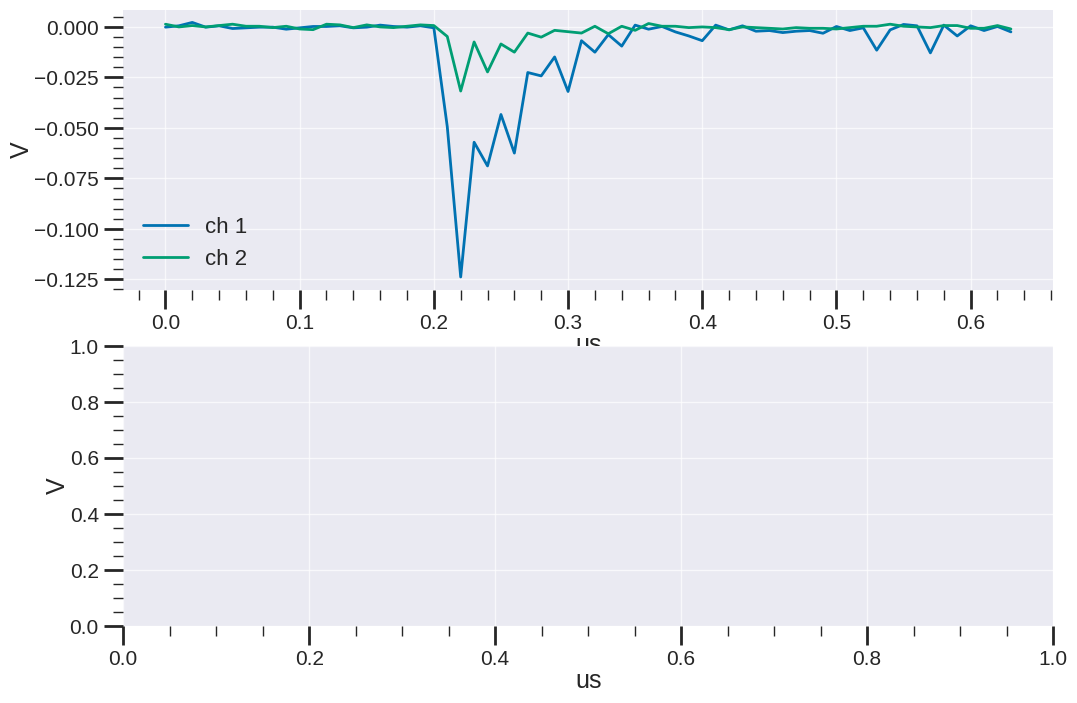

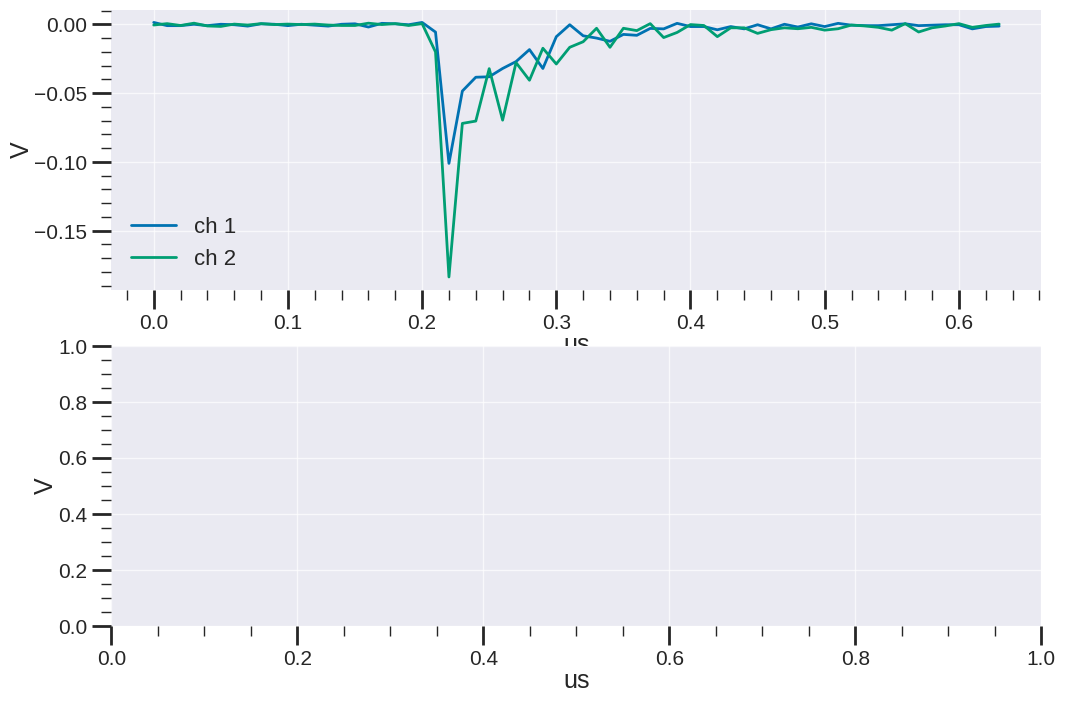

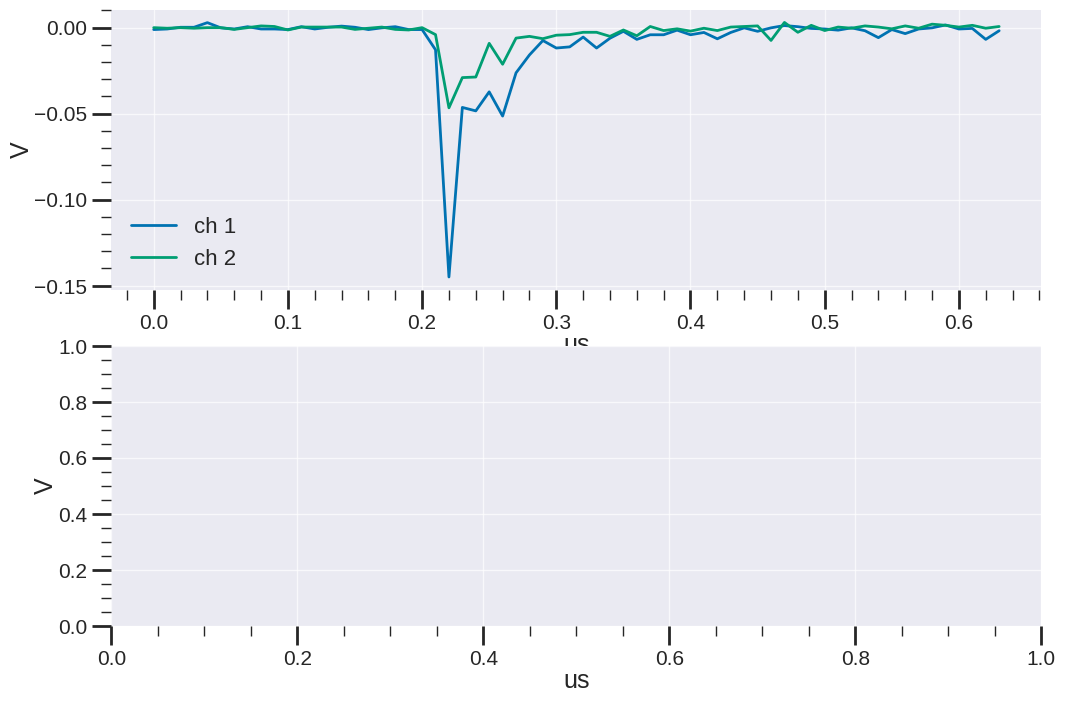

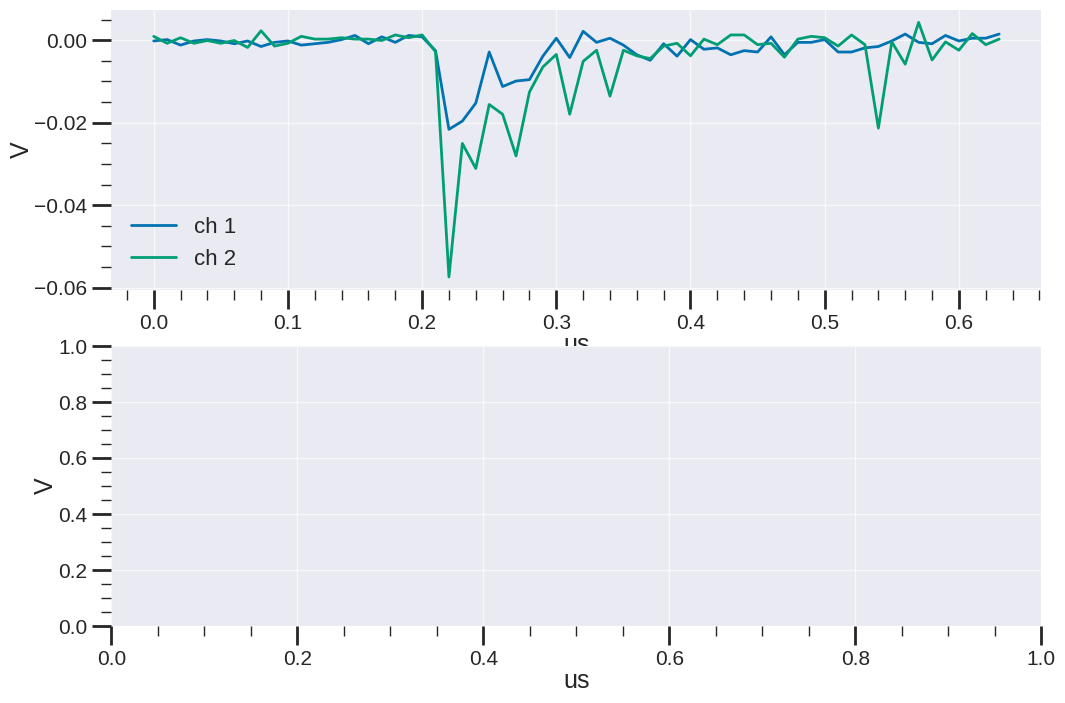

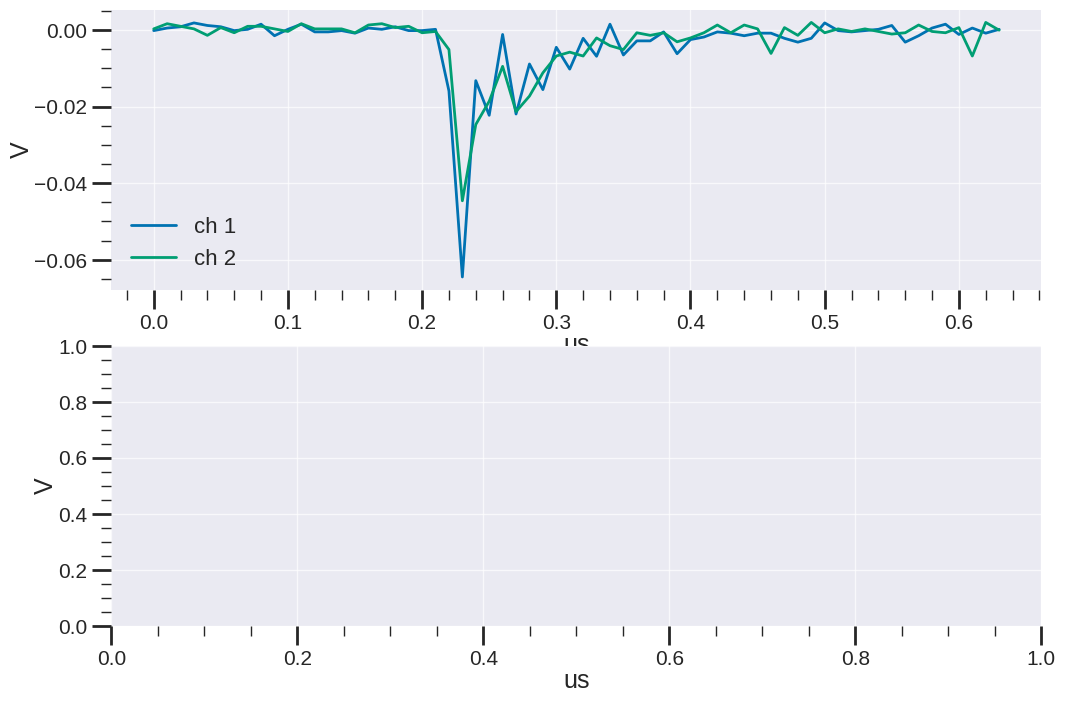

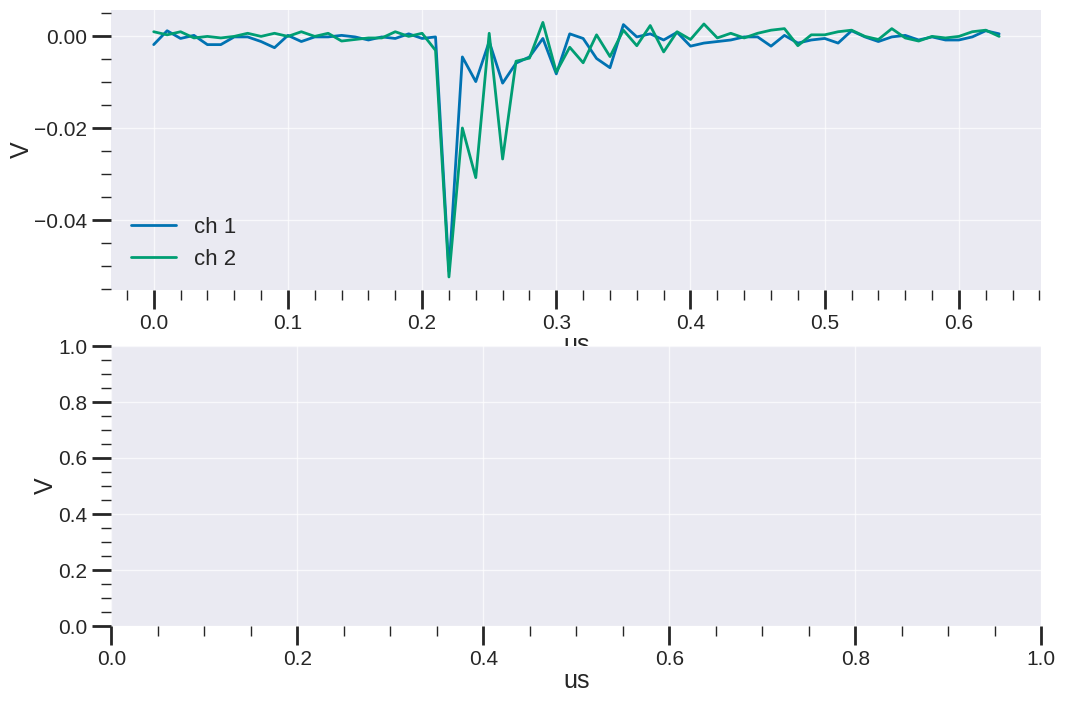

In [3]:
#get random waveforms and plot them
nev = 10
somewaves = d.get_random_waveforms(nev)

for i, row in somewaves.iterrows():
    fig, ax = plt.subplots(nrows=2)
    if(row['pmts0-data'] != []):
        pmttimes = np.arange(0, len(row['pmts0-data'])*row['pmtsSamplingPeriod'], row['pmtsSamplingPeriod'])
        ax[0].plot(pmttimes, row['pmts0-data'], linewidth=2, label="ch 1")
        ax[0].plot(pmttimes, row['pmts1-data'], linewidth=2, label="ch 2")
        ax[0].legend()
    if(row['glitch0-data'] != []):
        anodetimes = np.arange(0, len(row['glitch0-data'])*row['glitchSamplingPeriod'], row['glitchSamplingPeriod'])
        ax[1].plot(anodetimes, row['glitch1-data'], label="anode")
        ax[1].legend()
        
    #ax[0].set_xlim([30, 50])
    ax[0].set_xlabel("us")
    ax[1].set_xlabel("us")
    ax[0].set_ylabel("V")
    ax[1].set_ylabel("V")
    plt.show()




In [17]:
allowed_dt = 20 #ms
d.pair_by_timestamp(allowed_dt)

Finding candidates within allowed_dt: 0it [00:00, ?it/s]

Lost 2899 events of 8007 / 8141 due to windowing
Dividing, : 0.36 / 0.36
Multiplicities with no distillation: {1: 5098, 2: 10}


Distilling repeated candidates : 0it [00:00, ?it/s]

Multiplicities with distillation: {1: 5097, 2: 10, 0: 1}


Determining final pairing and saving pairs...:   0%|          | 0/5108 [00:00<?, ?it/s]

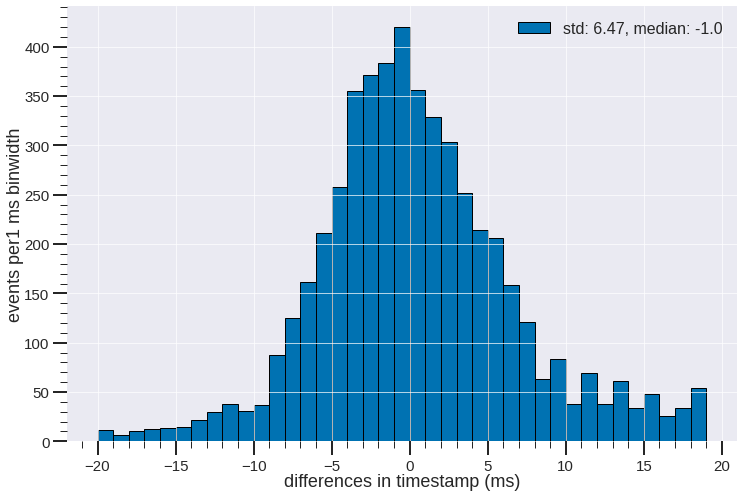

In [18]:
d.plot_timestamp_differences()
plt.show()

In [7]:
d.print_timestamps_sidebyside(80)

pmts2023-04-19 15:00:27.872000, glitch2023-04-19 15:00:33.576000, 

pmts2023-04-19 15:00:29.562000, glitch2023-04-19 15:00:39.100000, 

pmts2023-04-19 15:00:31.523000, glitch2023-04-19 15:00:39.204000, 

pmts2023-04-19 15:00:33.062000, glitch2023-04-19 15:00:40.034000, 

pmts2023-04-19 15:00:33.452000, glitch2023-04-19 15:00:40.366000, 

pmts2023-04-19 15:00:33.512000, glitch2023-04-19 15:00:42.038000, 

pmts2023-04-19 15:00:34.052000, glitch2023-04-19 15:00:44.420000, 

pmts2023-04-19 15:00:34.124000, glitch2023-04-19 15:00:44.615000, 

pmts2023-04-19 15:00:34.238000, glitch2023-04-19 15:00:44.901000, 

pmts2023-04-19 15:00:34.602000, glitch2023-04-19 15:00:46.766000, 

pmts2023-04-19 15:00:34.953000, glitch2023-04-19 15:00:47.704000, 

pmts2023-04-19 15:00:35.513000, glitch2023-04-19 15:00:50.306000, 

pmts2023-04-19 15:00:37.024000, glitch2023-04-19 15:00:51.573000, 

pmts2023-04-19 15:00:37.932000, glitch2023-04-19 15:00:53.091000, 

pmts2023-04-19 15:00:41.822000, glitch2023-04-19

In [40]:
d.create_reduced_df(config_file="../configs/run5_config.yaml")

Loading config file ../configs/run5_config.yaml


Reducing waveform data:   0%|          | 0/1381 [00:00<?, ?it/s]

Done


In [41]:
print(d.reduced_df.columns)

Index(['RogowskiVoltage', 'pmtsTimestamp', 'PMT1Amplitude', 'PMT2Amplitude',
       'PMT1Peakidx', 'PMT2Peakidx', 'PMT1Integral', 'PMT2Integral', 'PMT1std',
       'PMT2std', 'glitchTimestamp', 'GlitchAmplitude', 'AnodeAmplitude',
       'GlitchTau', 'AnodeTau', 'GlitchPeakidx', 'AnodePeakidx',
       'GlitchIntegral', 'AnodeIntegral'],
      dtype='object')


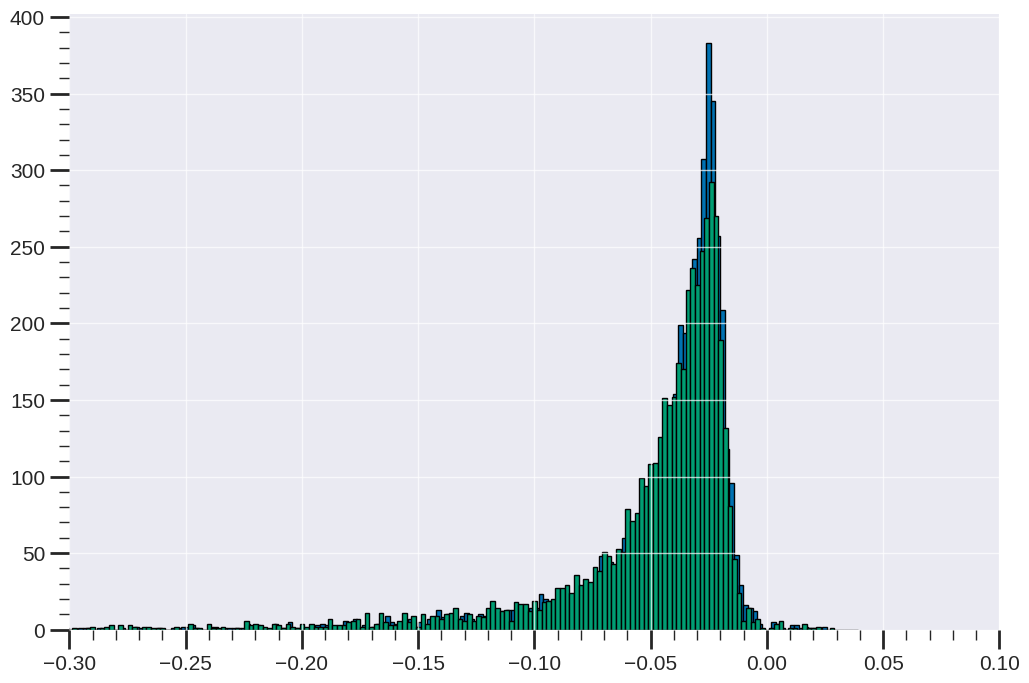

In [5]:
fig, ax = plt.subplots()
s = d.reduced_df["PMT1Amplitude"]
bins = np.arange(min(s), max(s), 0.002)
ax.hist(d.reduced_df["PMT1Amplitude"], bins=bins)
s = d.reduced_df["PMT2Amplitude"]
bins = np.arange(min(s), max(s), 0.002)
ax.hist(d.reduced_df["PMT2Amplitude"], bins=bins)
ax.set_xlim([-0.3, 0.1])
plt.show()

In [4]:
print(len(d.wave_df.index))

5000
